In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
#Initial analysis/EDA
data.shape

(600, 6)

In [5]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [8]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


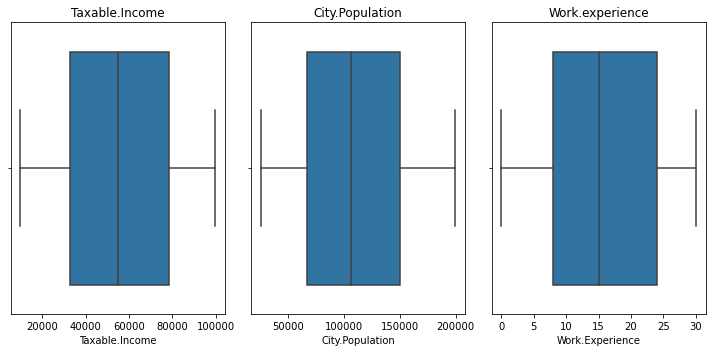

In [10]:
#check the outlier in data
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
sns.boxplot(x='Taxable.Income',data=data)
plt.title('Taxable.Income')

plt.subplot(1,3,2)
sns.boxplot(x='City.Population',data=data)
plt.title('City.Population')

plt.subplot(1,3,3)
sns.boxplot(x='Work.Experience',data=data)
plt.title('Work.experience')

plt.tight_layout()

In [11]:
#Adding new column 'income' 
data['income']='<=30000'
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,<=30000
1,YES,Divorced,33700,134075,18,YES,<=30000
2,NO,Married,36925,160205,30,YES,<=30000
3,YES,Single,50190,193264,15,YES,<=30000
4,NO,Married,81002,27533,28,NO,<=30000


In [12]:
#Converting the Taxable income variable to bucketing
data.loc[data['Taxable.Income']>30000, 'income']='Good'
data.loc[data['Taxable.Income']<=30000, 'income'] ='Risky'

In [13]:
data.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
5,NO,Divorced,33329,116382,0,NO,Good
6,NO,Divorced,83357,80890,8,YES,Good
7,YES,Single,62774,131253,3,YES,Good
8,NO,Single,83519,102481,12,YES,Good
9,YES,Divorced,98152,155482,4,YES,Good


In [14]:
#Droping the Taxable income variable
data.drop(['Taxable.Income'],axis=1, inplace=True)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [15]:
data['income'].value_counts()

Good     476
Risky    124
Name: income, dtype: int64

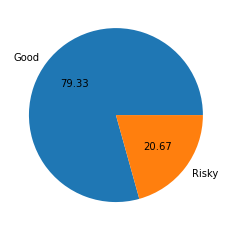

In [16]:
plt.pie(data['income'].value_counts(),autopct='%0.2f', labels=['Good', 'Risky'], data= data)
plt.show()

In [17]:
#Model.fit not consider String. So, we encode
label_en = LabelEncoder()
for i in range(0, data.shape[1]):
    if data.dtypes[i] == 'object':
        data[data.columns[i]] = label_en.fit_transform(data[data.columns[i]])
        
data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [18]:
#Splitting Dataset into features & labels
x = data.iloc[:,0:-1]
y = data['income']

In [19]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int32

In [21]:
#Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=40, stratify=y)

In [22]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
582,1,1,32907,12,1
111,0,2,164526,11,1
19,0,2,126953,30,1
595,1,0,39492,7,1
427,0,0,99025,10,0
...,...,...,...,...,...
588,1,1,93242,27,1
333,1,2,44775,13,1
456,0,2,53788,23,1
37,0,1,66912,5,1


In [23]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
8,0,2,102481,12,1
149,0,2,49505,25,0
450,1,0,91936,8,1
177,0,1,31156,13,1
373,0,1,175719,21,1
...,...,...,...,...,...
27,1,2,28542,12,1
366,1,1,131469,30,0
93,1,1,137676,3,1
272,0,2,126488,1,1


In [24]:
y_train

582    0
111    0
19     1
595    0
427    0
      ..
588    0
333    1
456    0
37     0
539    0
Name: income, Length: 420, dtype: int32

In [25]:
y_test

8      0
149    0
450    0
177    0
373    0
      ..
27     0
366    0
93     1
272    0
294    0
Name: income, Length: 180, dtype: int32

In [26]:
x_train.shape

(420, 5)

In [27]:
x_test.shape

(180, 5)

In [28]:
y_train.shape

(420,)

In [29]:
y_test.shape

(180,)

*unstable data

In [30]:
#Building model with imbalanced data
#model
model_1 = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=40)
model_1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

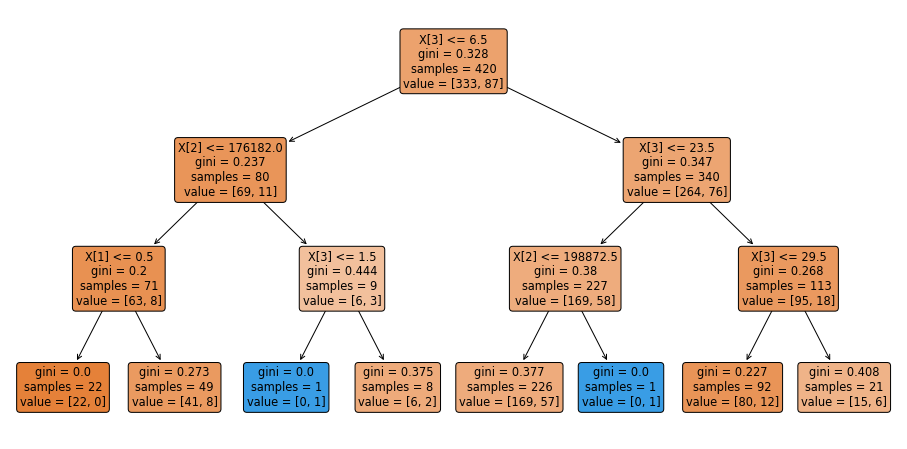

In [31]:
plt.figure(figsize = (16,8))
tree.plot_tree(model_1,rounded=True,filled=True)
plt.show()

In [32]:
#Model Evaluation
y_train_pred1 = model_1.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred1)
print('Accuracy score for trained data: ', round(accuracy, 4))

Accuracy score for trained data:  0.7976


In [33]:
confusion_matrix(y_train, y_train_pred1)

array([[333,   0],
       [ 85,   2]], dtype=int64)

In [34]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       333
           1       1.00      0.02      0.04        87

    accuracy                           0.80       420
   macro avg       0.90      0.51      0.47       420
weighted avg       0.84      0.80      0.71       420



In [35]:
#Model Prediction using test data
y_test_pred1= model_1.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred1)
print('Accuracy Score for tested data : ', round(accuracy_test, 4))

Accuracy Score for tested data :  0.7944


In [36]:
confusion_matrix(y_test, y_test_pred1)

array([[143,   0],
       [ 37,   0]], dtype=int64)

In [37]:
print(classification_report(y_test, y_test_pred1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [38]:
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=40)
model_2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=40)

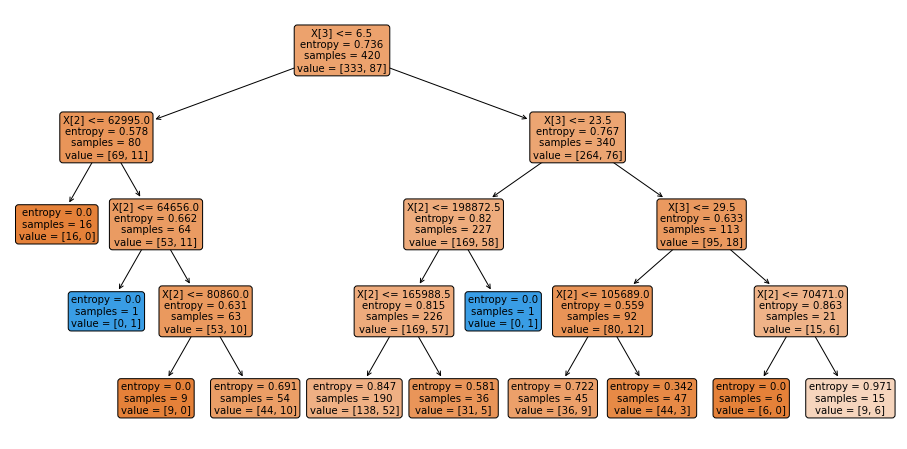

In [39]:
plt.figure(figsize = (16,8))
tree.plot_tree(model_2,rounded=True,filled=True)
plt.show()

In [40]:
#Model Evaluation
y_train_pred2 = model_2.predict(x_train)
accuracy = accuracy_score(y_train, y_train_pred2)
print('Accuracy score for trained data: ', round(accuracy, 4))

Accuracy score for trained data:  0.7976


In [41]:
confusion_matrix(y_train, y_train_pred2)

array([[333,   0],
       [ 85,   2]], dtype=int64)

In [42]:
print(classification_report(y_train, y_train_pred2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       333
           1       1.00      0.02      0.04        87

    accuracy                           0.80       420
   macro avg       0.90      0.51      0.47       420
weighted avg       0.84      0.80      0.71       420



In [43]:
#Model Prediction using test data
y_test_pred2 = model_2.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred2)
print('Accuracy Score for tested data : ', round(accuracy_test, 4))

Accuracy Score for tested data :  0.7944


In [44]:
confusion_matrix(y_test, y_test_pred2)

array([[143,   0],
       [ 37,   0]], dtype=int64)

In [45]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [46]:
#Building Decision Tree Classifier Model
#using hyper parameter
model_3 = DecisionTreeClassifier(random_state=40)
criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model_3, param_grid=params, cv = 10)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 1}
0.7904761904761904


In [47]:
model_4= DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=40)
model_4.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=40)

In [48]:
#Model evaluation on trained data
y_train_pred_4 = model_4.predict(x_train)
accuracy_train_4 = accuracy_score(y_train, y_train_pred_4) 
print('Accuracy score for trained data: ', round(accuracy_train_4, 4))

Accuracy score for trained data:  0.7976


In [49]:
confusion_matrix(y_train, y_train_pred_4)

array([[333,   0],
       [ 85,   2]], dtype=int64)

In [50]:
print(classification_report(y_train, y_train_pred_4))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       333
           1       1.00      0.02      0.04        87

    accuracy                           0.80       420
   macro avg       0.90      0.51      0.47       420
weighted avg       0.84      0.80      0.71       420



In [51]:
y_test_pred_4= model_4.predict(x_test)
accuracy_test_4 = accuracy_score(y_test, y_test_pred_4)
print('Accuracy Score of Test data :', round(accuracy_test_4, 4))

Accuracy Score of Test data : 0.7944


In [52]:
confusion_matrix(y_test, y_test_pred_4)

array([[143,   0],
       [ 37,   0]], dtype=int64)

In [53]:
print(classification_report(y_test, y_test_pred_4))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



79% accuracy and 0% recall on the test data. That’s a huge difference!
Model prediction is highly biased.
So to handle the imabalanced data, will be using SMOTE technique.

In [54]:
#Handling imbalanced trained data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 40)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [55]:
print('x_train after resampling shape : ' , x_train_res.shape)
print('y_train after resampling shape : ' , y_train_res.shape)
print(y_train_res.value_counts())

x_train after resampling shape :  (666, 5)
y_train after resampling shape :  (666,)
0    333
1    333
Name: income, dtype: int64


In [56]:
print(y_test.value_counts())

0    143
1     37
Name: income, dtype: int64


In [57]:
#Building Decision Tree Classifier Model with balanced train data
model_5 = DecisionTreeClassifier(random_state=40)
criterion = ['entropy', 'gini']
max_depth = range(1,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model_5, param_grid=params, cv = 10)
grid.fit(x_train_res, y_train_res)
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 9}
0.689280868385346


In [58]:
model_final= DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=40)
model_final.fit(x_train_res, y_train_res)

DecisionTreeClassifier(max_depth=5, random_state=40)

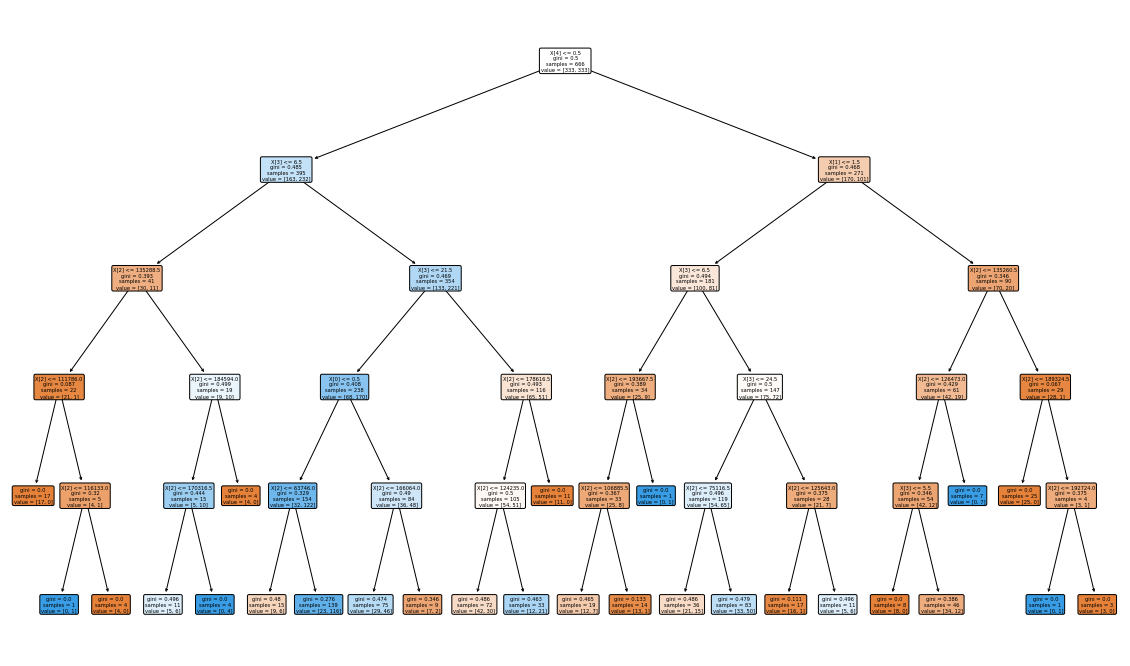

In [59]:
plt.figure(figsize = (20,12))
tree.plot_tree(model_final,rounded=True,filled=True)
plt.show()

In [60]:
#Model Evaluation on trained data
y_train_pred = model_final.predict(x_train_res)
accuracy_train = accuracy_score(y_train_res, y_train_pred) 
print('Accuracy score for trained data: ', round(accuracy_train, 4))

Accuracy score for trained data:  0.7282


In [61]:
confusion_matrix(y_train_res, y_train_pred)

array([[226, 107],
       [ 74, 259]], dtype=int64)

In [62]:
print(classification_report(y_train_res, y_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       333
           1       0.71      0.78      0.74       333

    accuracy                           0.73       666
   macro avg       0.73      0.73      0.73       666
weighted avg       0.73      0.73      0.73       666



In [63]:
#Predicting model on test data
y_test_pred= model_final.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy Score of Test data :', round(accuracy_test, 4))

Accuracy Score of Test data : 0.5167


In [64]:
confusion_matrix(y_test, y_test_pred)

array([[77, 66],
       [21, 16]], dtype=int64)

In [65]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.54      0.64       143
           1       0.20      0.43      0.27        37

    accuracy                           0.52       180
   macro avg       0.49      0.49      0.45       180
weighted avg       0.66      0.52      0.56       180



Conclusion:
This final model(built after handling imbalanced data) is better than the first model(built with imbalanced data)
because it classifies better and also the recall value of minority class is 43 %. But due to undersampling of majority class, 
its recall has decreased to 54 %.
So in this case, SMOTE is giving me a great accuracy and recall, I’ll go ahead and use that model